#Objetivo del proyecto


El objetivo principal de este proyecto es desarrollar un sistema de recomendación basado en el contenido para películas y series de la plataforma Netflix, utilizando técnicas de Minería de Textos y Procesamiento de Lenguaje Natural (PNL).
El modelo tendrá la capacidad de analizar las características descriptivas de cada título —como género, reparto, dirección y sinopsis— con el fin de identificar similitudes entre producciones y sugerir contenidos que se ajusten a los intereses del usuario.

# Librerias Principales

In [ ]:
#Incluya las principales librerias a utilizar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss

# Carga de datos


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/8 ciclo/Data Mining Tools/Trabajo/Trabajo Parcial/netflix_titles.csv")

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Analisis y exploracion de datos


| **Variable**     | **Descripción**                                                                     |
| ---------------- | ----------------------------------------------------------------------------------- |
| **show_id**      | Identificador único asignado a cada título del catálogo de Netflix.                 |
| **type**         | Clasifica el contenido como *Movie* (película) o *TV Show* (serie).                 |
| **title**        | Nombre oficial del título disponible en la plataforma.                              |
| **director**     | Nombre del director o directora de la producción (puede contener valores nulos).    |
| **cast**         | Lista de los actores y actrices que participan en la obra.                          |
| **country**      | País o países de origen de la producción audiovisual.                               |
| **date_added**   | Fecha en la que el título fue incorporado al catálogo de Netflix.                   |
| **release_year** | Año de estreno o lanzamiento de la película o serie.                                |
| **rating**       | Clasificación por edad o tipo de audiencia (por ejemplo, *PG-13*, *TV-MA*).         |
| **duration**     | Duración de la película (en minutos) o cantidad de temporadas en el caso de series. |
| **listed_in**    | Géneros o categorías temáticas en las que se enmarca el contenido.                  |
| **description**  | Breve sinopsis o resumen del argumento principal del título.                        |


In [ ]:
data.head(-1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


In [ ]:
data.shape

(8807, 12)

In [ ]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
data.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
null_percent=(data.isnull().sum()/len(data))*100
null_percent.sort_values(ascending=False)

,0
director,29.908028
country,9.435676
cast,9.367549
date_added,0.113546
rating,0.045418
duration,0.034064
show_id,0.000000
type,0.000000
title,0.000000
release_year,0.000000


| Columna            | % de nulos | Observación         |
| ------------------ | ---------- | ------------------- |
| **director**       | 29.9%      | Muy alto            |
| **country**        | 9.4%       | Moderado            |
| **cast**           | 9.3%       | Moderado            |
| **date_added**     | 0.11%      | Muy bajo            |
| **rating**         | 0.04%      | Muy bajo            |
| **duration**       | 0.03%      | Muy bajo            |
| **Otras columnas** | 0%         | Sin datos faltantes |


In [ ]:
data.duplicated().sum()

0

# Tratar los valores nulos o duplicados

Eliminación de registros incompletos

Se utiliza cuando la cantidad de valores nulos es muy baja (< 1%) y no afecta la integridad del dataset.
En este caso, se pueden eliminar filas con nulos en:
- date_added
- rating
- duration

In [ ]:
data = data.dropna(subset=['date_added', 'rating', 'duration'])

Imputación para reemplazo nulos, debido a que no se pueden tratar porque las paises, actores y directores difieren mucho de donde son, asi que vamos a importar a algun nombre.

In [ ]:
data['director'].fillna('Unknown', inplace=True)
data['cast'].fillna('Unknown', inplace=True)
data['country'].fillna('Unknown', inplace=True)

In [ ]:
data.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


# Datos estadisticos numericos y descriptivos


Variable numerica

In [ ]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
data[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,8790.0,2014.183163,8.825466,1925.0,2013.0,2017.0,2019.0,2021.0


Variables categóricas

In [ ]:
categorical_cols = data.select_dtypes(include=['object']).columns

In [ ]:
data[categorical_cols].describe().T

,count,unique,top,freq
show_id,8790,8790,s1,1
type,8790,2,Movie,6126
title,8790,8790,Dick Johnson Is Dead,1
director,8790,4527,Unknown,2621
cast,8790,7679,Unknown,825
country,8790,749,United States,2809
date_added,8790,1765,"January 1, 2020",109
rating,8790,14,TV-MA,3205
duration,8790,220,1 Season,1791
listed_in,8790,513,"Dramas, International Movies",362


| **Variable**     | **Tipo de dato** | **Cantidad de valores válidos** | **Valores únicos** | **Valor más frecuente (Top)**                          | **Frecuencia del Top** | **Descripción del análisis**                                                                                                                    |
| ---------------- | ---------------- | ------------------------------- | ------------------ | ------------------------------------------------------ | ---------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------- |
| **release_year** | Numérico (int64) | 8,790                           | –                  | –                                                      | –                      | Los años de lanzamiento varían entre **1925 y 2021**, con una media de **2014**. La mayoría de los títulos se concentran entre **2013 y 2019**. |
| **type**         | Categórico       | 8,790                           | 2                  | *Movie*                                                | 6,126                  | El dataset contiene dos tipos de contenido: **películas** y **series**, predominando las películas.                                             |
| **title**        | Categórico       | 8,790                           | 8,790              | *Zubaan*                                               | 1                      | Cada título es único, sin duplicados.                                                                                                           |
| **director**     | Categórico       | 8,790                           | 4,527              | *Unknown*                                              | 2,621                  | Gran cantidad de valores faltantes reemplazados por *Unknown*.                                                                                  |
| **cast**         | Categórico       | 8,790                           | 7,679              | *Unknown*                                              | 825                    | Alta diversidad de elencos; algunos registros sin información.                                                                                  |
| **country**      | Categórico       | 8,790                           | 749                | *United States*                                        | 2,809                  | Producciones provenientes principalmente de **Estados Unidos**.                                                                                 |
| **date_added**   | Categórico       | 8,790                           | 1,765              | *January 1, 2020*                                      | 109                    | Registra las fechas en que los títulos fueron añadidos; amplia variación temporal.                                                              |
| **rating**       | Categórico       | 8,790                           | 14                 | *TV-MA*                                                | 3,205                  | Clasificación por edades; la más común es *TV-MA* (contenido para adultos).                                                                     |
| **duration**     | Categórico       | 8,790                           | 220                | *1 Season*                                             | 1,791                  | Representa duración de películas (minutos) o temporadas en series.                                                                              |
| **listed_in**    | Categórico       | 8,790                           | 513                | *Dramas, International Movies*                         | 362                    | Amplia variedad de géneros; los dramas internacionales son los más comunes.                                                                     |
| **description**  | Texto            | 8,790                           | 8,758              | *Paranormal activity at a lush, abandoned property...* | 4                      | Cada título posee una sinopsis descriptiva casi única.                                                                                          |


El análisis estadístico evidencia que el dataset está bien estructurado, con una mayoría de películas recientes y descripciones textuales ricas en información. Estos atributos son altamente útiles para la aplicación de técnicas de Minería de Textos (NLP) y para la construcción de un sistema de recomendación basado en el contenido.

**ahora como adicional compararemos algunos datos descriptivos que me puedan ser ultil mas adelante para el modelo**

In [ ]:
#!pip install numpy==1.26.4

In [ ]:
#!pip install sweetviz

In [ ]:
import sweetviz as sv

In [ ]:
import warnings
warnings.simplefilter(action="ignore")

                                             |          | [  0%]   00:00 -> (? left)


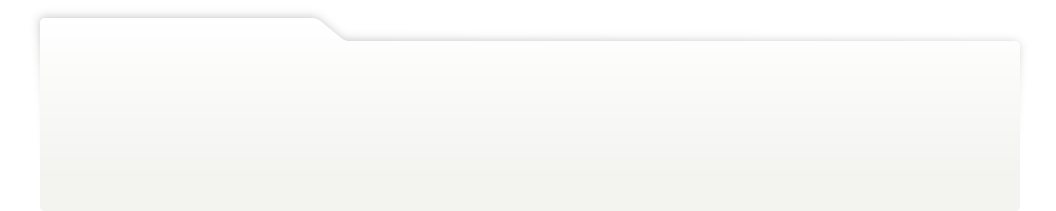
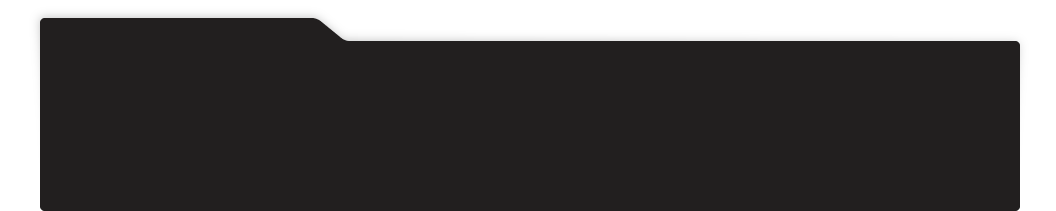
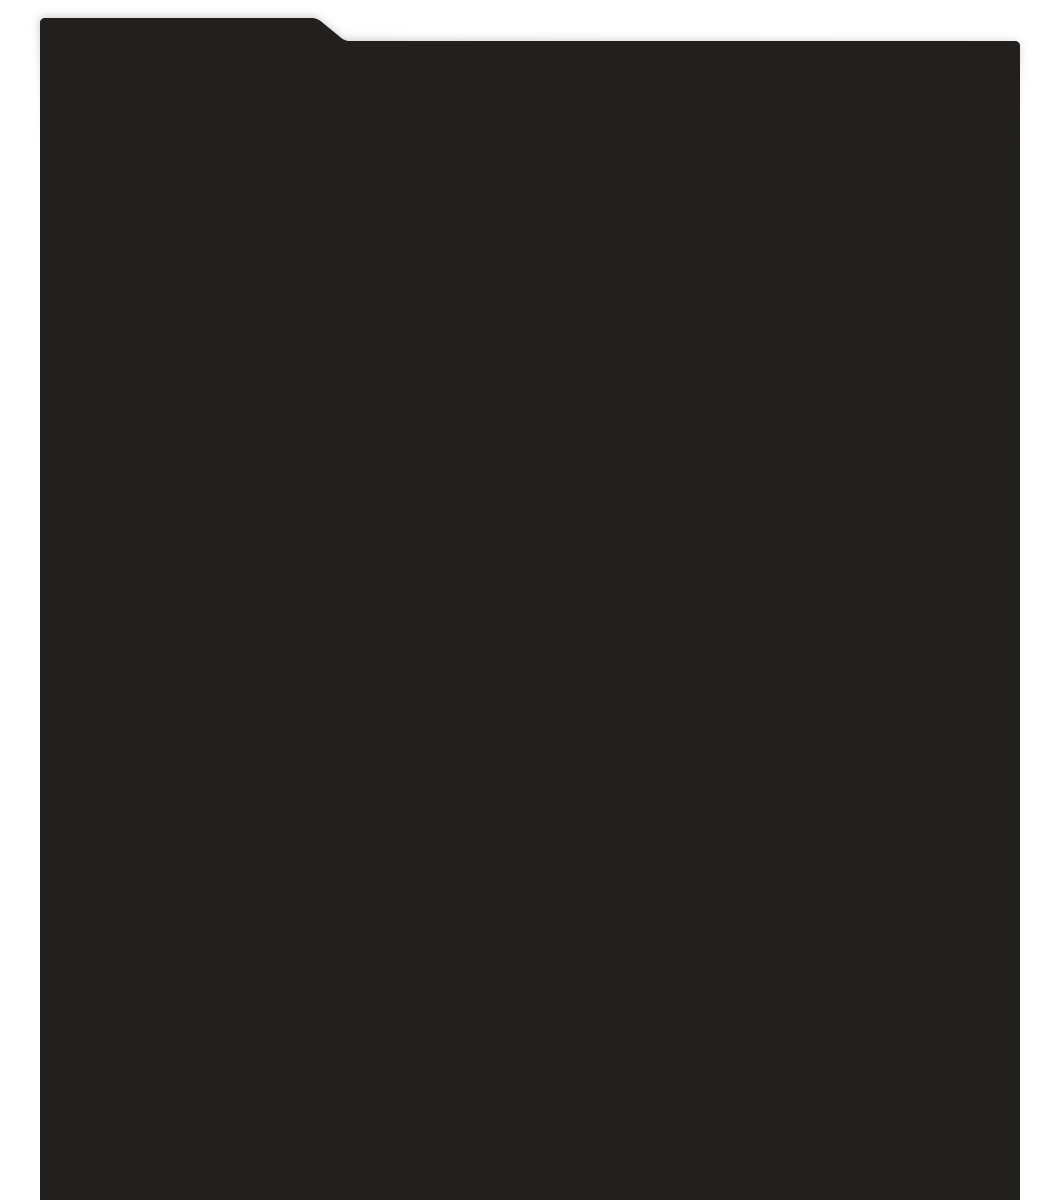
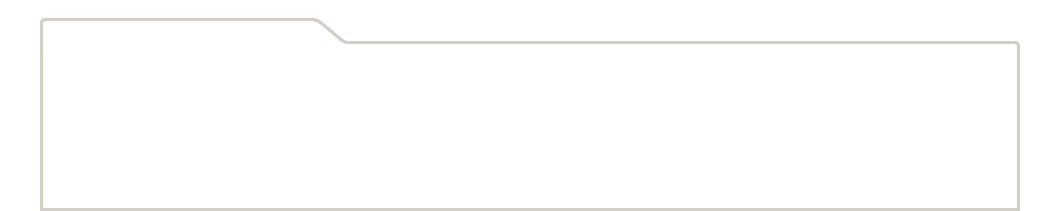
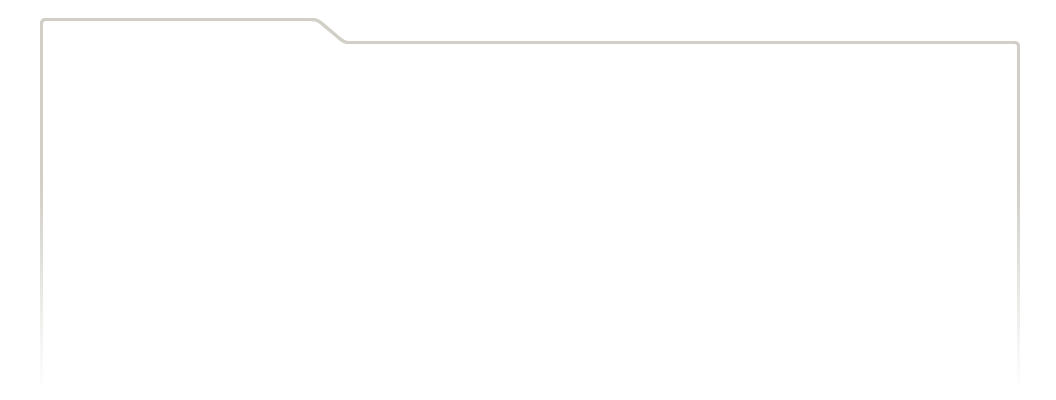
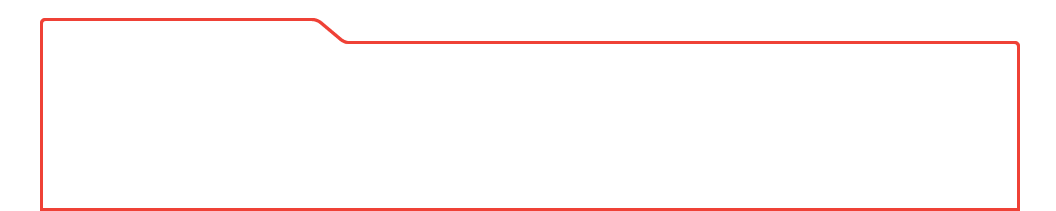
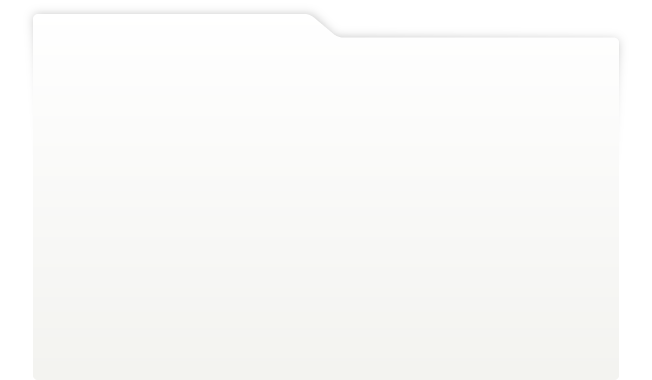
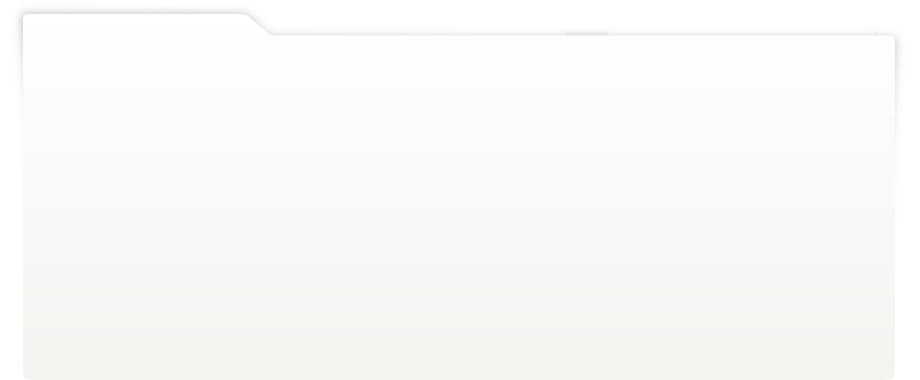
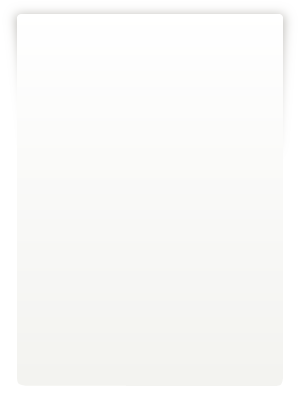
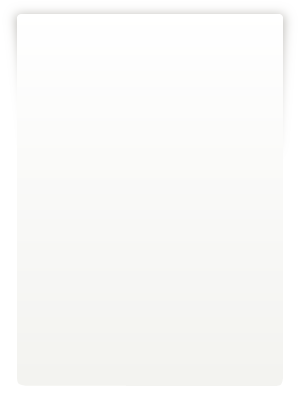
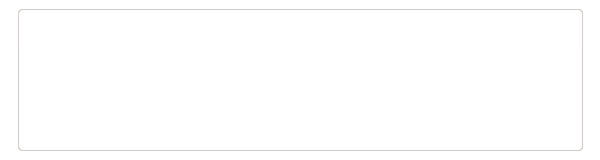
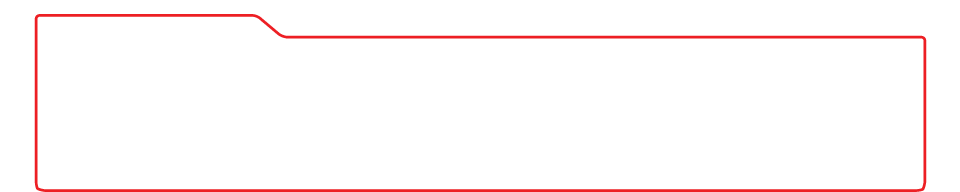
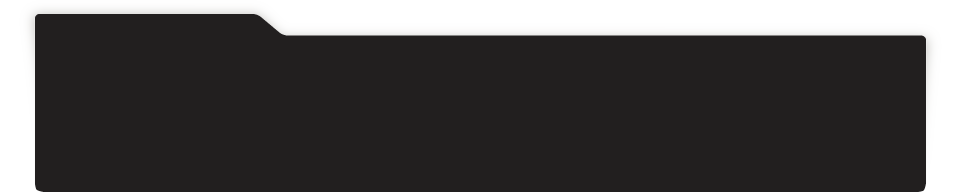
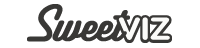
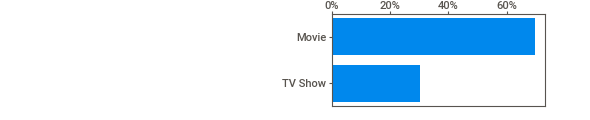
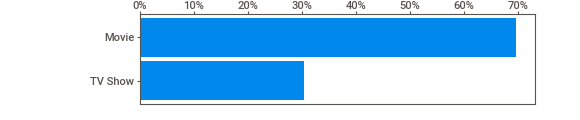
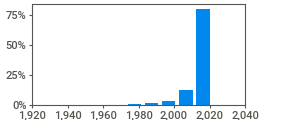
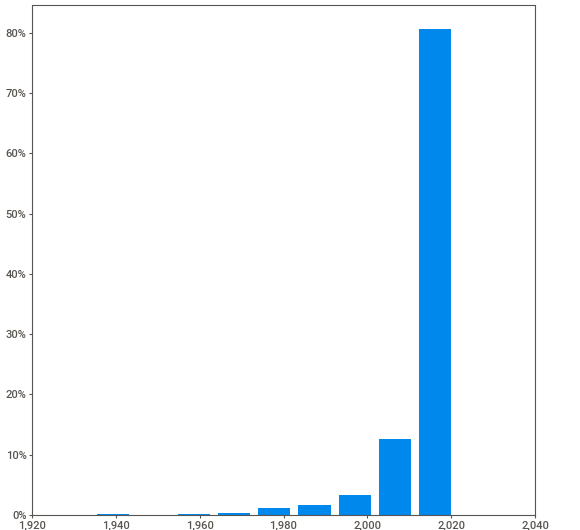
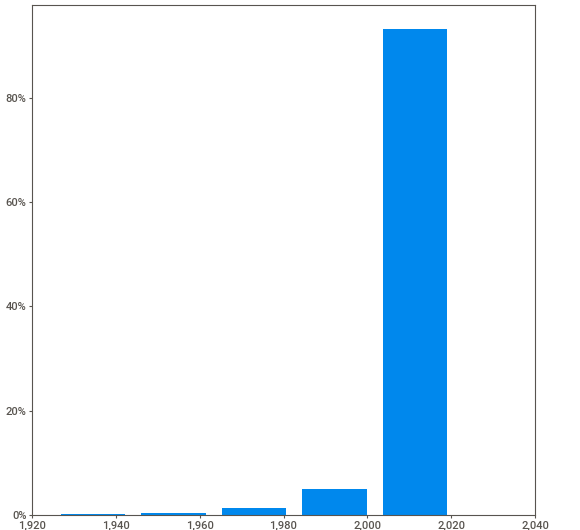
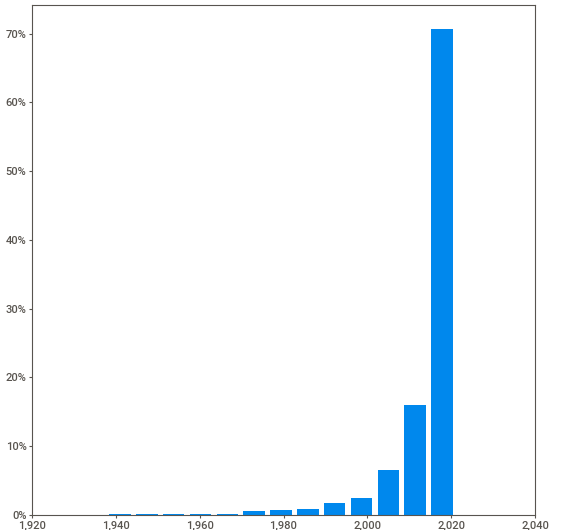
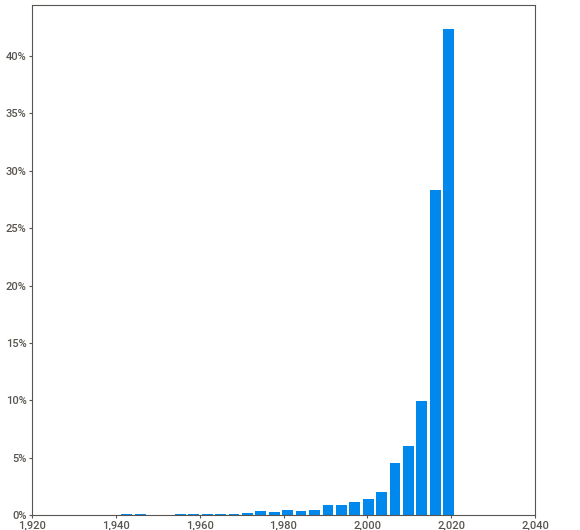
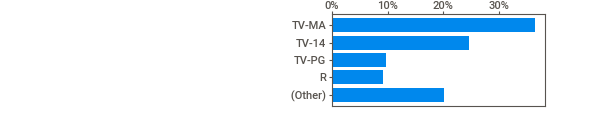
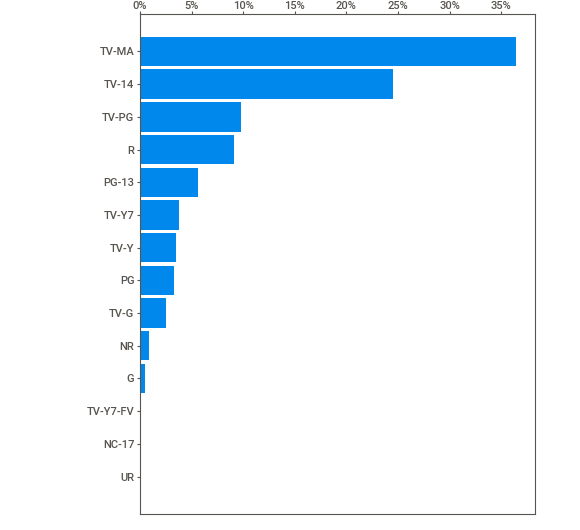
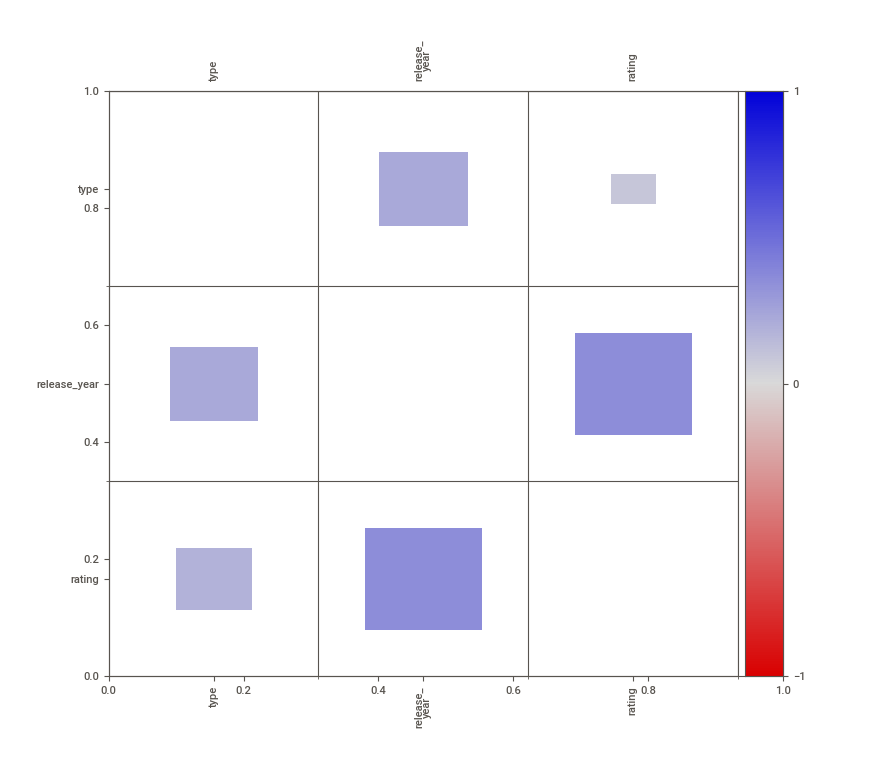
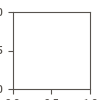

In [ ]:
report = sv.analyze(data)
report.show_notebook()

| **Variable**     | **Tipo de dato**   | **Valores / Categorías**          | **Cantidad de valores únicos** | **Valores destacados**                              | **Observaciones / Interpretación**                                                                         |
| ---------------- | ------------------ | --------------------------------- | ------------------------------ | --------------------------------------------------- | ---------------------------------------------------------------------------------------------------------- |
| **show_id**      | Categórico         | Identificador único por registro  | 8,790                          | –                                                   | Cada título posee un código único, lo que confirma la ausencia de duplicados.                              |
| **type**         | Categórico         | Movie / TV Show                   | 2                              | Movie (68%), TV Show (32%)                          | Predominan las películas sobre las series, evidenciando una mayor proporción de contenido cinematográfico. |
| **title**        | Categórico         | Nombres de producciones           | 8,790                          | Ej.: *Dick Johnson Is Dead*, *Your Lie in April*    | Todos los títulos son únicos, sin repeticiones.                                                            |
| **director**     | Categórico         | Nombres de directores o “Unknown” | 4,527                          | “Unknown” (30%), Rajiv Chilaka, Raul Campos         | Alta proporción de valores faltantes; algunos directores recurrentes.                                      |
| **cast**         | Categórico         | Listado de actores principales    | 7,679                          | “Unknown” (9%), David Attenborough, Samuel West     | Amplia variedad de elencos; algunos nombres se repiten en múltiples producciones.                          |
| **country**      | Categórico         | País o países de origen           | 749                            | Estados Unidos (32%), India (11%), Reino Unido (5%) | Estados Unidos domina la producción, seguido por India y Reino Unido.                                      |
| **date_added**   | Fecha (`datetime`) | Fecha de incorporación a Netflix  | 1,765                          | 1 ene 2020, 1 nov 2019, 1 mar 2018                  | Mayor concentración de fechas entre 2018 y 2021, evidenciando expansión reciente del catálogo.             |
| **release_year** | Numérico (int)     | Año de lanzamiento                | 74                             | Min: 1925, Máx: 2021, Media: 2014                   | La mayoría de títulos fueron estrenados entre 2013 y 2019, reflejando un catálogo moderno.                 |
| **rating**       | Categórico         | Clasificación por edad            | 14                             | TV-MA (32%), TV-14 (16%), TV-PG (12%)               | Predomina contenido para audiencias adultas, principalmente clasificado como TV-MA.                        |
| **duration**     | Texto (ordinal)    | Minutos o temporadas              | 220                            | 1 Season (20%), 90–97 min (≈6%)                     | Las películas duran alrededor de 90 minutos; la mayoría de series tienen una temporada.                    |
| **listed_in**    | Categórico         | Géneros o categorías              | 513                            | Dramas, Documentaries, Stand-Up Comedy              | Diversidad de géneros, predominando dramas y documentales.                                                 |
| **description**  | Texto              | Sinopsis de cada título           | 8,758                          | Descripciones únicas en >99%                        | Alto nivel de unicidad, ideal para aplicar técnicas de Minería de Textos y NLP.                            |


okay de comparar algunas columnas importantes, tenemos que volver date_added a datetime

In [ ]:
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

In [ ]:
data.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,88
release_year,0
rating,0
duration,0


que salga nulos es muy normal, ya que le estamos diciendo a la data que toda fecha mal escrita sea NAN, vamos a proceder a eliminar, ya que esa data no nos sirve

In [ ]:
data['date_added'].fillna(method='ffill', inplace=True)

# Manejo de outliers y valores atípicos.

In [ ]:
data['duration_num'] = data['duration'].str.extract('(\d+)').astype(float)

# Seleccionar columnas numéricas
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Crear un DataFrame vacío para resultados
outlier_summary = pd.DataFrame(columns=['Columna', 'Outliers', 'Porcentaje'])

# Calcular outliers por método IQR
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    mask = (data[col] < lower) | (data[col] > upper)
    num_out = mask.sum()
    perc_out = (num_out / len(data)) * 100
    outlier_summary = pd.concat([outlier_summary, pd.DataFrame([[col, num_out, perc_out]],
                                columns=['Columna', 'Outliers', 'Porcentaje'])])

# Mostrar resultados
print(outlier_summary)

        Columna Outliers  Porcentaje
0  release_year      717    8.156997
0  duration_num        2    0.022753


# Analizando las columnas

#### Columnas que debes conservar

| **Columna**                   | **Por qué conservarla**                                                                          |
| ----------------------------- | ------------------------------------------------------------------------------------------------ |
| **title**                     | Identifica la película o serie y servirá como etiqueta del contenido recomendado.                |
| **type**                      | Ayuda a distinguir entre películas y series (podrías usarlo como filtro adicional).              |
| **director**                  | Puede aportar similitud entre obras del mismo creador.                                           |
| **cast**                      | Contiene nombres de actores, que suelen ser fuertes indicadores de similitud entre producciones. |
| **listed_in**                 | Representa los géneros y categorías, esenciales para calcular similitudes temáticas.             |
| **description**               | Es la variable más importante para PNL: contiene el texto que describe el contenido.             |
| **country** *(opcional)*      | Puede usarse si deseas personalizar recomendaciones por región o tipo de producción.             |
| **release_year** *(opcional)* | Permite controlar la antigüedad o priorizar títulos más recientes en las recomendaciones.        |


#### Columnas que puedes eliminar o ignorar

| **Columna**    | **Motivo para eliminarla**                                                 |
| -------------- | -------------------------------------------------------------------------- |
| **show_id**    | Es solo un identificador, no aporta significado.                           |
| **date_added** | Indica cuándo se añadió a Netflix, no influye en el contenido en sí.       |
| **rating**     | Es una categoría regulatoria, no refleja el tipo de historia ni el tema.   |
| **duration**   | Aunque útil para análisis exploratorio, no describe el contenido temático. |


ahora empezaremos con el texto

# Fase 1 — Limpieza estructural (preliminar)

In [ ]:
import re

In [ ]:
def clean_text_basic(text):
    text = str(text).lower()                      # minúsculas
    text = re.sub(r'\[.*?\]', '', text)           # eliminar texto entre corchetes
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # quitar URLs
    text = re.sub(r'<.*?>+', '', text)            # quitar etiquetas HTML
    text = re.sub(r'[^a-zA-Z\s]', '', text)       # quitar símbolos y números
    text = re.sub(r'\s+', ' ', text).strip()      # quitar espacios extras
    return text

data['description_clean'] = data['description'].apply(clean_text_basic)

# Fase 2 — Limpieza lingüística (para NLP)

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Tokeninazion

In [ ]:
data['tokens'] = data['description_clean'].apply(word_tokenize)

In [ ]:
data['tokens'].head(1)

,tokens
0,"[as, her, father, nears, the, end, of, his, li..."


Eliminacion de stop words

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))
data['tokens'] = data['tokens'].apply(lambda x: [w for w in x if w.lower() not in stop_words])

Lematizar

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()
data['tokens'] = data['tokens'].apply(lambda x: [lemmatizer.lemmatize(w) for w in x])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


ahora preparamos el texto para posible modelo

In [ ]:
data['text_final'] = data['tokens'].apply(lambda x: ' '.join(x))

ahora vericaremos que datos y que columnas no son necesarias para poder resolver nuestro objetivo.

# Eligiendo las Columnas:

Columnas que se deben conservar:

| **Columna**                  | **Razón para mantenerla**                                                                                               |
| ---------------------------- | ----------------------------------------------------------------------------------------------------------------------- |
| `title`                      | Es el identificador principal del contenido (sirve para mostrar el nombre del título recomendado).                      |
| `type`                       | Permite distinguir entre “Movie” y “TV Show”, útil si luego quieres generar filtros o analizar por tipo.                |
| `director`                   | Puede aportar información de estilo o afinidad (por ejemplo, recomendar otras películas del mismo director).            |
| `cast`                       | Importante para capturar similitudes basadas en actores recurrentes.                                                    |
| `listed_in`                  | Representa los géneros o categorías — fundamental para agrupar contenidos por tipo de historia o tema.                  |
| `description` o `text_final` | Es la base textual que alimentará el modelo TF-IDF o embeddings. Usa **`text_final`**, ya que está limpia y lematizada. |
| `release_year`               | Útil para agregar contexto temporal (por ejemplo, recomendar títulos recientes o del mismo periodo).                    |


columnas que no deberia conservar, ya que no aportan nada:

| **Columna**                    | **Motivo para eliminarla**                                                                                                                            |
| ------------------------------ | ----------------------------------------------------------------------------------------------------------------------------------------------------- |
| `show_id`                      | Solo es un identificador interno; no aporta información semántica.                                                                                    |
| `country`                      | Tiene demasiados valores nulos y no siempre representa el estilo o contenido.                                                                         |
| `date_added`                   | Se relaciona con cuándo se agregó a Netflix, no con su similitud temática.                                                                            |
| `rating`                       | Aunque indica clasificación por edad, no contribuye mucho a similitud semántica. Puedes conservarla para análisis descriptivo, no para recomendación. |
| `duration` / `duration_num`    | No aporta al modelo de similitud textual. Podría servir para análisis exploratorio, pero no para recomendación directa.                               |
| `description_clean` / `tokens` | Son columnas intermedias del preprocesamiento, no necesarias para el modelo final.                                                                    |


In [ ]:
data_model = data[['title', 'type', 'director', 'cast', 'listed_in', 'release_year', 'text_final']]

In [ ]:
data_model.head()

,title,type,director,cast,listed_in,release_year,text_final
0,Dick Johnson Is Dead,Movie,Kirsten Johnson,Unknown,Documentaries,2020,father nears end life filmmaker kirsten johnso...
1,Blood & Water,TV Show,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","International TV Shows, TV Dramas, TV Mysteries",2021,crossing path party cape town teen set prove w...
2,Ganglands,TV Show,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...","Crime TV Shows, International TV Shows, TV Act...",2021,protect family powerful drug lord skilled thie...
3,Jailbirds New Orleans,TV Show,Unknown,Unknown,"Docuseries, Reality TV",2021,feud flirtation toilet talk go among incarcera...
4,Kota Factory,TV Show,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...","International TV Shows, Romantic TV Shows, TV ...",2021,city coaching center known train india finest ...


In [ ]:
data_model['combined'] = (
    data_model['text_final'] + ' ' +
    data_model['director'].fillna('') + ' ' +
    data_model['cast'].fillna('') + ' ' +
    data_model['listed_in'].fillna('')
)

In [ ]:
data_model.head()

,title,type,director,cast,listed_in,release_year,text_final,combined
0,Dick Johnson Is Dead,Movie,Kirsten Johnson,Unknown,Documentaries,2020,father nears end life filmmaker kirsten johnso...,father nears end life filmmaker kirsten johnso...
1,Blood & Water,TV Show,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","International TV Shows, TV Dramas, TV Mysteries",2021,crossing path party cape town teen set prove w...,crossing path party cape town teen set prove w...
2,Ganglands,TV Show,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...","Crime TV Shows, International TV Shows, TV Act...",2021,protect family powerful drug lord skilled thie...,protect family powerful drug lord skilled thie...
3,Jailbirds New Orleans,TV Show,Unknown,Unknown,"Docuseries, Reality TV",2021,feud flirtation toilet talk go among incarcera...,feud flirtation toilet talk go among incarcera...
4,Kota Factory,TV Show,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...","International TV Shows, Romantic TV Shows, TV ...",2021,city coaching center known train india finest ...,city coaching center known train india finest ...


ahora la pregunta es para que nos sirve seguir manteniendo las demas columnas si ya las combinamos aqui les explico:

| Columna        | ¿Para qué sirve mantenerla?                                                    | Ejemplo                                                                |
| -------------- | ------------------------------------------------------------------------------ | ---------------------------------------------------------------------- |
| `text_final`   | Guardar la versión limpia del texto, útil para futuras pruebas de modelos NLP. | Puedes comparar TF-IDF vs embeddings.                                  |
| `director`     | Mostrar en los resultados recomendados.                                        | “Te recomendamos *Inception*, también dirigida por Christopher Nolan.” |
| `cast`         | Permite análisis adicionales o filtros.                                        | “Mostrar solo películas con Leonardo DiCaprio.”                        |
| `listed_in`    | Sirve para agrupar o filtrar por géneros.                                      | “Recomendar dramas similares a esta comedia romántica.”                |
| `release_year` | Agregar contexto temporal o filtros.                                           | “Solo mostrar títulos después de 2015.”                                |
| `type`         | Permite separar películas y series.                                            | “Mostrar solo TV Shows similares.”                                     |
